In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import time
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [17]:
# === PATHS SETUP ===
SCRIPT_PATH = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(SCRIPT_PATH, '..', '..', 'data', 'preprocessed', 'analysis_data'))
MODELS_DIR = os.path.abspath(os.path.join(SCRIPT_PATH, '..', '..', 'models', 'qda'))
FEATURES_NAMES_DIR = os.path.abspath(os.path.join(DATA_DIR,'feature_names.pkl'))
os.makedirs(MODELS_DIR, exist_ok=True)

In [18]:
# === DATA LOADING ===
train_path = os.path.join(DATA_DIR, 'train.csv')
test_path = os.path.join(DATA_DIR, 'test.csv')

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

target_col = 'Fault_Condition'
feature_cols = joblib.load(FEATURES_NAMES_DIR)

X_train = train_data[feature_cols]
y_train_raw = train_data[target_col]
X_test = test_data[feature_cols]
y_test_raw = test_data[target_col]


le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test = le.transform(y_test_raw)
print("Mapowanie klas:", dict(zip(le.classes_, le.transform(le.classes_))))

print(f"Model: Quadratic Discriminant Analysis (QDA)")
print(f"Number of features: {len(feature_cols)}")

Mapowanie klas: {'faulty': np.int64(0), 'faulty_zip': np.int64(1), 'healthy': np.int64(2), 'healthy_zip': np.int64(3)}
Model: Quadratic Discriminant Analysis (QDA)
Number of features: 26


In [19]:
# === TRAINING AND OPTIMIZATION ===
param_grid = {'reg_param': np.linspace(0.0, 1.0, num=21)}

qda = QuadraticDiscriminantAnalysis()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

start_time = time.time()

grid_search = GridSearchCV(qda, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

elapsed_time = time.time() - start_time
best_model = grid_search.best_estimator_

print(f"Optimization finished in {elapsed_time:.2f}s")
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Optimization finished in 0.08s
Best parameters: {'reg_param': np.float64(0.8)}


In [20]:
# === EVALUATION ===
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {test_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.9107

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.82      1.00      0.90        14
           2       0.93      0.93      0.93        14
           3       0.93      0.93      0.93        14

    accuracy                           0.91        56
   macro avg       0.92      0.91      0.91        56
weighted avg       0.92      0.91      0.91        56



<Figure size 800x600 with 0 Axes>

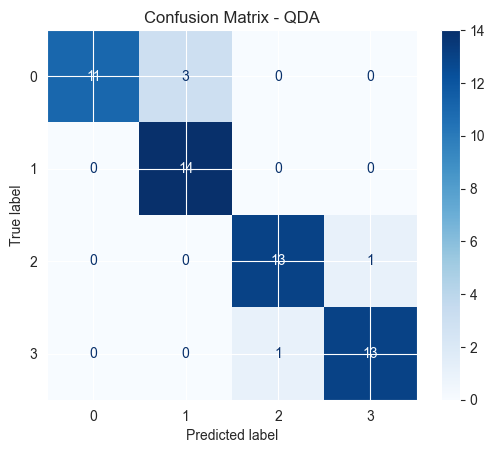

In [21]:
# === CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - QDA")
plt.show()

In [23]:
# === CROSS-VALIDATION CHECK ===
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"\nMean Cross-Validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# === SAVING MODEL ===
model_filename = 'qda_model.pkl'
model_path = os.path.join(MODELS_DIR, model_filename)
joblib.dump(best_model, model_path)
print(f"\nModel saved to: {model_path}")

encoder_filename = 'label_encoder.pkl'
encoder_path = os.path.join(MODELS_DIR, encoder_filename)
joblib.dump(le, encoder_path)
print(f"Label Encoder saved to: {encoder_path}")


Mean Cross-Validation Score: 0.8751 (+/- 0.0629)

Model saved to: C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\models\qda\qda_model.pkl
Label Encoder saved to: C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\models\qda\label_encoder.pkl


C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Jakub\Kuba_lokalne\studia\Praca_magisterska\Projekt\Fault-detection-in-mechanical-devices\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Jaku